<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/outlier_removal_using_iqr_day_43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/content/placement (1).csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
X = df.drop(columns = ['placed'])
y = df['placed']

/tmp/ipython-input-2788784443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


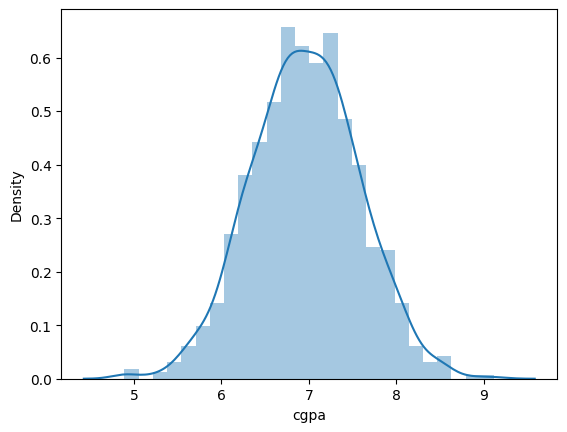

In [5]:
sns.distplot(df['cgpa'])
plt.show()

/tmp/ipython-input-768504883.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


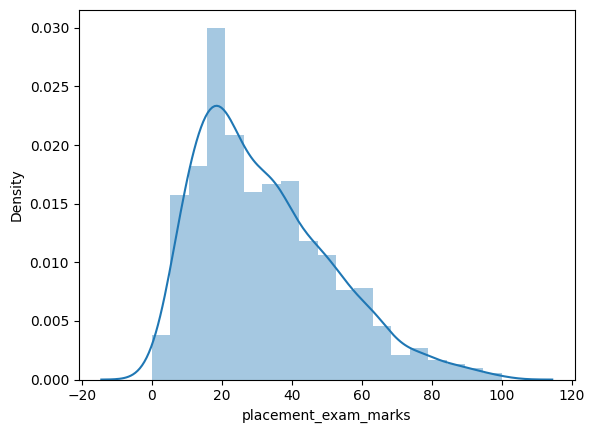

In [6]:
sns.distplot(df['placement_exam_marks'])
plt.show()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [8]:
X_train.shape


(800, 2)

In [9]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.54

In [12]:
#now by doing the preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [14]:
#outlier dtection and removal

In [15]:
df['cgpa']

,cgpa
0,7.19
1,7.46
2,7.54
3,6.42
4,7.23
...,...
995,8.87
996,9.12
997,4.89
998,8.62


In [16]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [17]:
# trimming
new_trim_df = df[(df['cgpa'] >= lower_limit) & (df['cgpa'] <= upper_limit)]

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

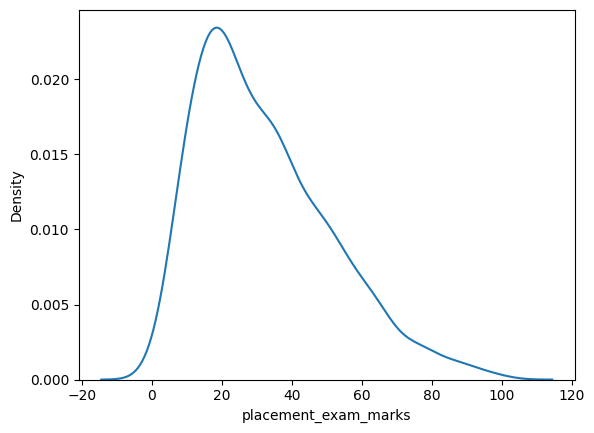

In [18]:
sns.kdeplot(new_trim_df['placement_exam_marks'])

In [19]:
from sklearn.preprocessing import PowerTransformer,FunctionTransformer

trf1 = PowerTransformer(method = "yeo-johnson")
new_trim_df['placement_exam_marks'] = pd.DataFrame(trf1.fit_transform(new_trim_df[['placement_exam_marks']]),columns=new_trim_df[['placement_exam_marks']].columns)

/tmp/ipython-input-638918816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_trim_df['placement_exam_marks'] = pd.DataFrame(trf1.fit_transform(new_trim_df[['placement_exam_marks']]),columns=new_trim_df[['placement_exam_marks']].columns)


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

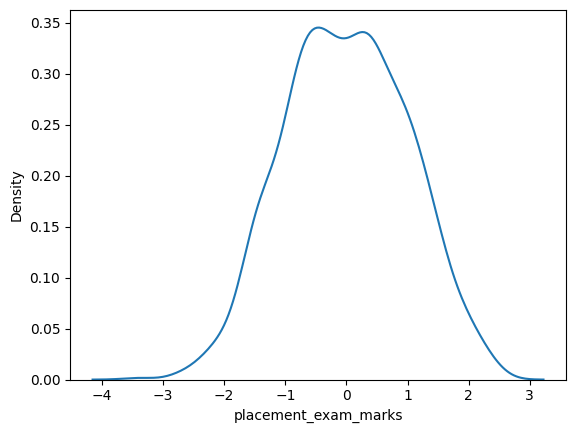

In [20]:
sns.kdeplot(new_trim_df['placement_exam_marks'])

In [21]:
new_up_limit  = new_trim_df['placement_exam_marks'].mean() + 3*new_trim_df['placement_exam_marks'].std()
new_low_limit = new_trim_df['placement_exam_marks'].mean() - 3*new_trim_df['placement_exam_marks'].std()
new_low_limit
new_up_limit

np.float64(2.9980722778097393)

In [22]:
new_trim_df = new_trim_df[(new_trim_df['placement_exam_marks'] >= new_low_limit) & (new_trim_df['placement_exam_marks'] <= new_up_limit)]

In [23]:
new_trim_df[new_trim_df['placement_exam_marks'] <= new_low_limit]

,cgpa,placement_exam_marks,placed


In [24]:
new_trim_df[new_trim_df['placement_exam_marks'] >= new_up_limit]

,cgpa,placement_exam_marks,placed


In [25]:
new_trim_df.shape

(993, 3)

In [26]:
X1 = new_trim_df.drop(columns = ['placed'])
y1 = new_trim_df['placed']

In [27]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 42)

In [28]:
lr_trimmed = LogisticRegression()
lr_trimmed.fit(X1_train,y1_train)

LogisticRegression()

In [29]:
lr_trimmed_pred = lr_trimmed.predict(X1_test)
accuracy_score(y1_test,lr_trimmed_pred)

0.5025125628140703

In [30]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [32]:
Q2 = df['placement_exam_marks'].median()

In [35]:
Q1 = np.percentile(df['placement_exam_marks'],25)
Q2 = np.percentile(df['placement_exam_marks'],50)
Q3 = np.percentile(df['placement_exam_marks'],75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print(upper_limit)
print(lower_limit)
print(Q1,Q2,Q3)
print(IQR)

84.5
-23.5
17.0 28.0 44.0
27.0


In [37]:
df[(df['placement_exam_marks'] >= upper_limit) | (df['placement_exam_marks'] <= lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [40]:
#trimming
new_df  = df[(df['placement_exam_marks'] <= upper_limit) & (df['placement_exam_marks'] >= lower_limit)]

In [41]:
#capping -> clipping
for i in new_df['placement_exam_marks']:
  if i >= upper_limit:
    new_df['placement_exam_marks'] = new_df['placement_exam_marks'].replace(i,upper_limit)
  elif i <= lower_limit:
    new_df['placement_exam_marks'] = new_df['placement_exam_marks'].replace(i,lower_limit)

In [44]:
new_df[(df['placement_exam_marks'] == upper_limit)]

/tmp/ipython-input-2360598721.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[(df['placement_exam_marks'] == upper_limit)]


,cgpa,placement_exam_marks,placed
